<a href="https://colab.research.google.com/github/sdikici/Demand_Forecasting_Prophet_DeepAR/blob/main/Visualizations_and_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d albertovidalrod/electricity-consumption-uk-20092022
! unzip electricity-consumption-uk-20092022.zip

 26% 5.00M/19.5M [00:00<00:00, 43.1MB/s]
100% 19.5M/19.5M [00:00<00:00, 109MB/s] 
Archive:  electricity-consumption-uk-20092022.zip
  inflating: historic_demand_2009_2024.csv  
  inflating: historic_demand_2009_2024_noNaN.csv  
  inflating: historic_demand_year_2009.csv  
  inflating: historic_demand_year_2010.csv  
  inflating: historic_demand_year_2011.csv  
  inflating: historic_demand_year_2012.csv  
  inflating: historic_demand_year_2013.csv  
  inflating: historic_demand_year_2014.csv  
  inflating: historic_demand_year_2015.csv  
  inflating: historic_demand_year_2016.csv  
  inflating: historic_demand_year_2017.csv  
  inflating: historic_demand_year_2018.csv  
  inflating: historic_demand_year_2019.csv  
  inflating: historic_demand_year_2020.csv  
  inflating: historic_demand_year_2021.csv  
  inflating: historic_demand_year_2022.csv  
  inflating: historic_demand_year_2023.csv  
  inflating: historic_demand_year_2024.csv  


In [ ]:
!kaggle datasets download -d sercandikici/london-weather-database-from-2009-to-2024
! unzip london-weather-database-from-2009-to-2024.zip

  0% 0.00/301k [00:00<?, ?B/s]
100% 301k/301k [00:00<00:00, 59.9MB/s]
Archive:  london-weather-database-from-2009-to-2024.zip
  inflating: London_2009_to_2024_forecast.csv  


In [ ]:
!kaggle datasets download -d sercandikici/weatherdata2
! unzip weatherdata2.zip

  0% 0.00/679k [00:00<?, ?B/s]
100% 679k/679k [00:00<00:00, 59.7MB/s]
Archive:  weatherdata2.zip
  inflating: weather 2021-01-01 to 2024-01-01.csv  


In [ ]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
'''
Load the historical demand data from the CSV file
Load the weather forecast data from the CSV file
'''

df_raw = pd.read_csv("historic_demand_2009_2024_noNaN.csv")
df_weather = pd.read_csv("London_2009_to_2024_forecast.csv")


In [ ]:
'''
Filter the DataFrame df_raw to include only the columns "settlement_date" and "tsd".
Select rows where the "settlement_date" falls within the range from "2020-01-01 00:00:00" to "2023-12-31 23:30:00".
Convert the "settlement_date" column to datetime format.
Group the data by the rounded "settlement_date" and calculate the mean of "tsd" for each weekly period.
'''
df2020_22 = df_raw[["settlement_date","tsd"]]
df2020_22 = df2020_22[(df2020_22["settlement_date"] >= "2020-01-01 00:00:00")&(df2020_22["settlement_date"] <= "2023-12-31 23:30:00")]
df2020_22['settlement_date'] = pd.to_datetime(df2020_22['settlement_date'])

df2020_22['settlement_date'] = df2020_22['settlement_date'].dt.floor('7D')
weekly = df2020_22.groupby('settlement_date').agg({'tsd': 'mean'}).reset_index()
weekly

<ipython-input-6-99c0af16eb9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020_22['settlement_date'] = pd.to_datetime(df2020_22['settlement_date'])
<ipython-input-6-99c0af16eb9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020_22['settlement_date'] = df2020_22['settlement_date'].dt.floor('7D')


,settlement_date,tsd
0,2019-12-26,29794.395833
1,2020-01-02,33005.619048
2,2020-01-09,33483.675595
3,2020-01-16,35861.818452
4,2020-01-23,35316.107143
...,...,...
205,2023-11-30,36848.407738
206,2023-12-07,33548.901786
207,2023-12-14,32416.392857
208,2023-12-21,27332.985119


In [ ]:
'''
Filter the DataFrame df_weather to include only the columns "datetime" and "temp".
Select rows where the "datetime" falls within the range from "2020-01-01" to "2023-12-31".
Convert the "datetime" column to datetime format.
Group the data by the rounded "datetime" and calculate the mean of "temp" for each weekly period.
'''
weather2020_22 = df_weather[["datetime","temp"]]
weather2020_22 = weather2020_22[(weather2020_22["datetime"] >= "2020-01-01")&(weather2020_22["datetime"] <= "2023-12-31")]
weather2020_22["datetime"] = pd.to_datetime(weather2020_22["datetime"])
weather2020_22['datetime'] = weather2020_22['datetime'].dt.floor('7D')
weekly_we = weather2020_22.groupby('datetime').agg({'temp': 'mean'}).reset_index()
weekly_we.reset_index(drop=True, inplace=True)
weekly_we

,datetime,temp
0,2019-12-26,5.400000
1,2020-01-02,8.700000
2,2020-01-09,9.371429
3,2020-01-16,5.557143
4,2020-01-23,6.914286
...,...,...
205,2023-11-30,3.600000
206,2023-12-07,8.971429
207,2023-12-14,9.071429
208,2023-12-21,11.185714


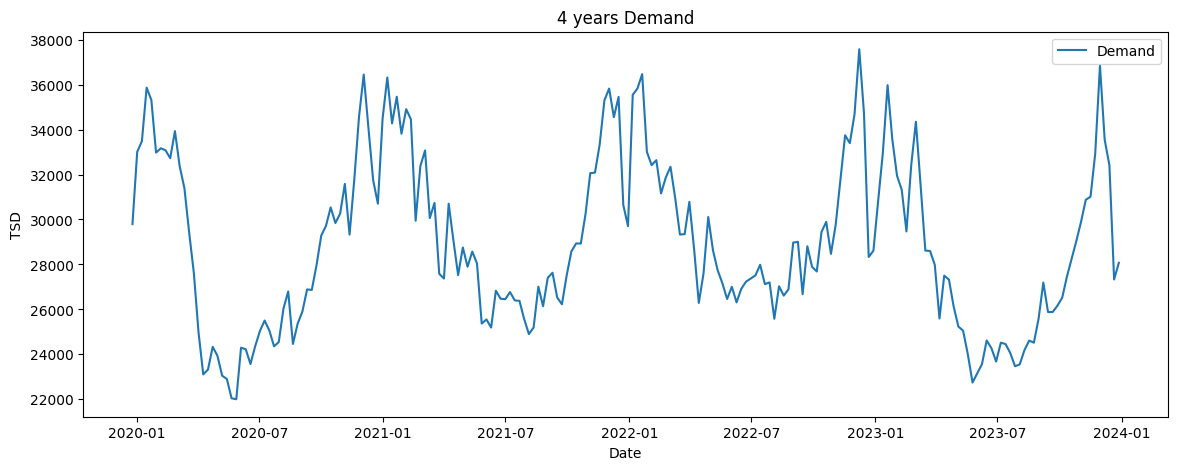

In [ ]:
'''
This code segment generates a plot showing the electricity demand ("tsd") over a span of four years.
Create a figure and axis with the specified size.
Plot the "settlement_date" on the x-axis and "tsd" on the y-axis from the DataFrame weekly.
Set the title of the plot as '4 years Demand'.
Set the labels for the x-axis and y-axis as 'Date' and 'TSD' respectively.
Show the plot.
'''
plt.subplots(figsize=(14, 5))
plt.plot(weekly['settlement_date'], weekly['tsd'], label='Demand')
plt.title('4 years Demand')
plt.xlabel('Date')
plt.ylabel('TSD')
plt.legend()
plt.show()

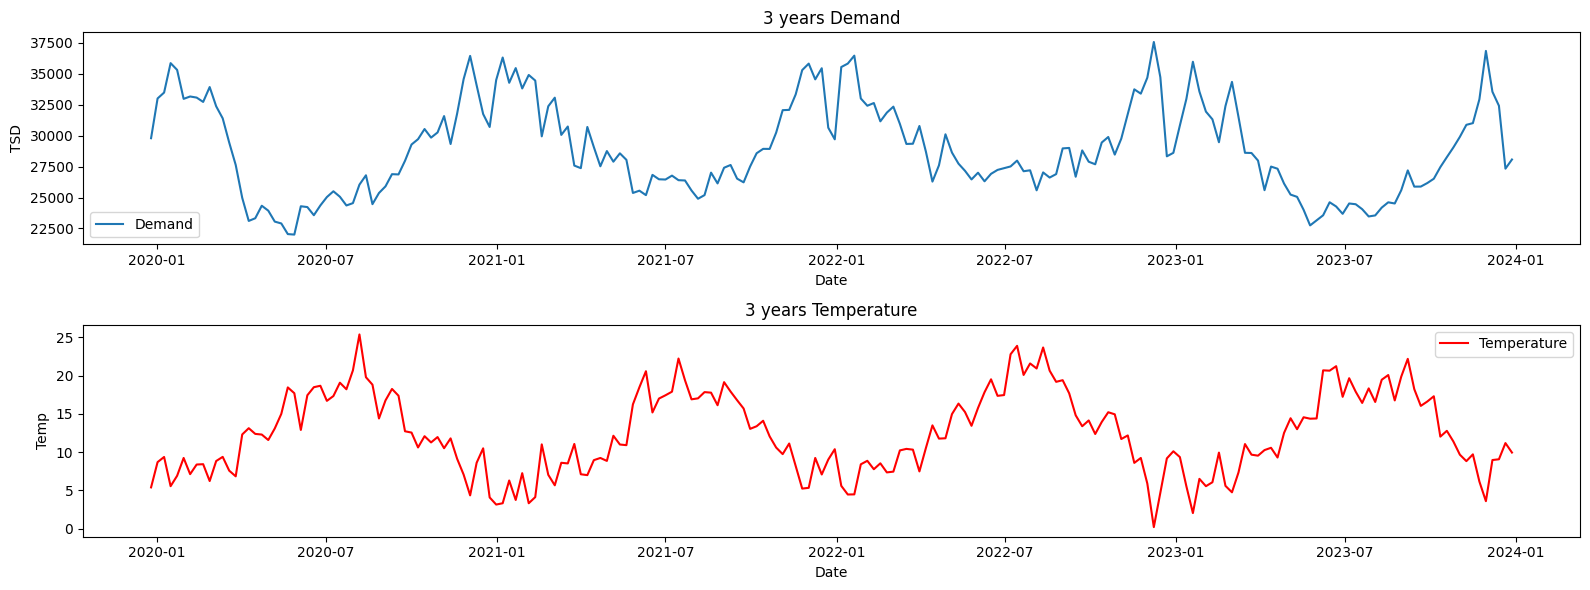

In [ ]:
'''
This code segment creates a subplot with two panels, one displaying the electricity demand ("tsd") over three years, and the other displaying the temperature over the same period.
The first panel plots the demand data from the DataFrame "weekly" against dates.
The second panel plots the temperature data from the DataFrame "weekly_we" against dates.
Each panel is labeled accordingly, and legends are added to denote the plotted data.
'''
fig, axs = plt.subplots(2, 1, figsize=(16, 6))  # 1 row, 2 columns

axs[0].plot(weekly['settlement_date'], weekly['tsd'], label='Demand')
axs[0].set_title('3 years Demand')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('TSD')
axs[0].legend()

axs[1].plot(weekly_we['datetime'], weekly_we['temp'], label='Temperature', color="red")
axs[1].set_title('3 years Temperature')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Temp')
axs[1].legend()

plt.tight_layout()
plt.show()

<ipython-input-10-e15a5c035bb5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_year['settlement_date'] = pd.to_datetime(df3_year['settlement_date'])
<ipython-input-10-e15a5c035bb5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_year['settlement_date'] = df3_year['settlement_date'].dt.floor('d')


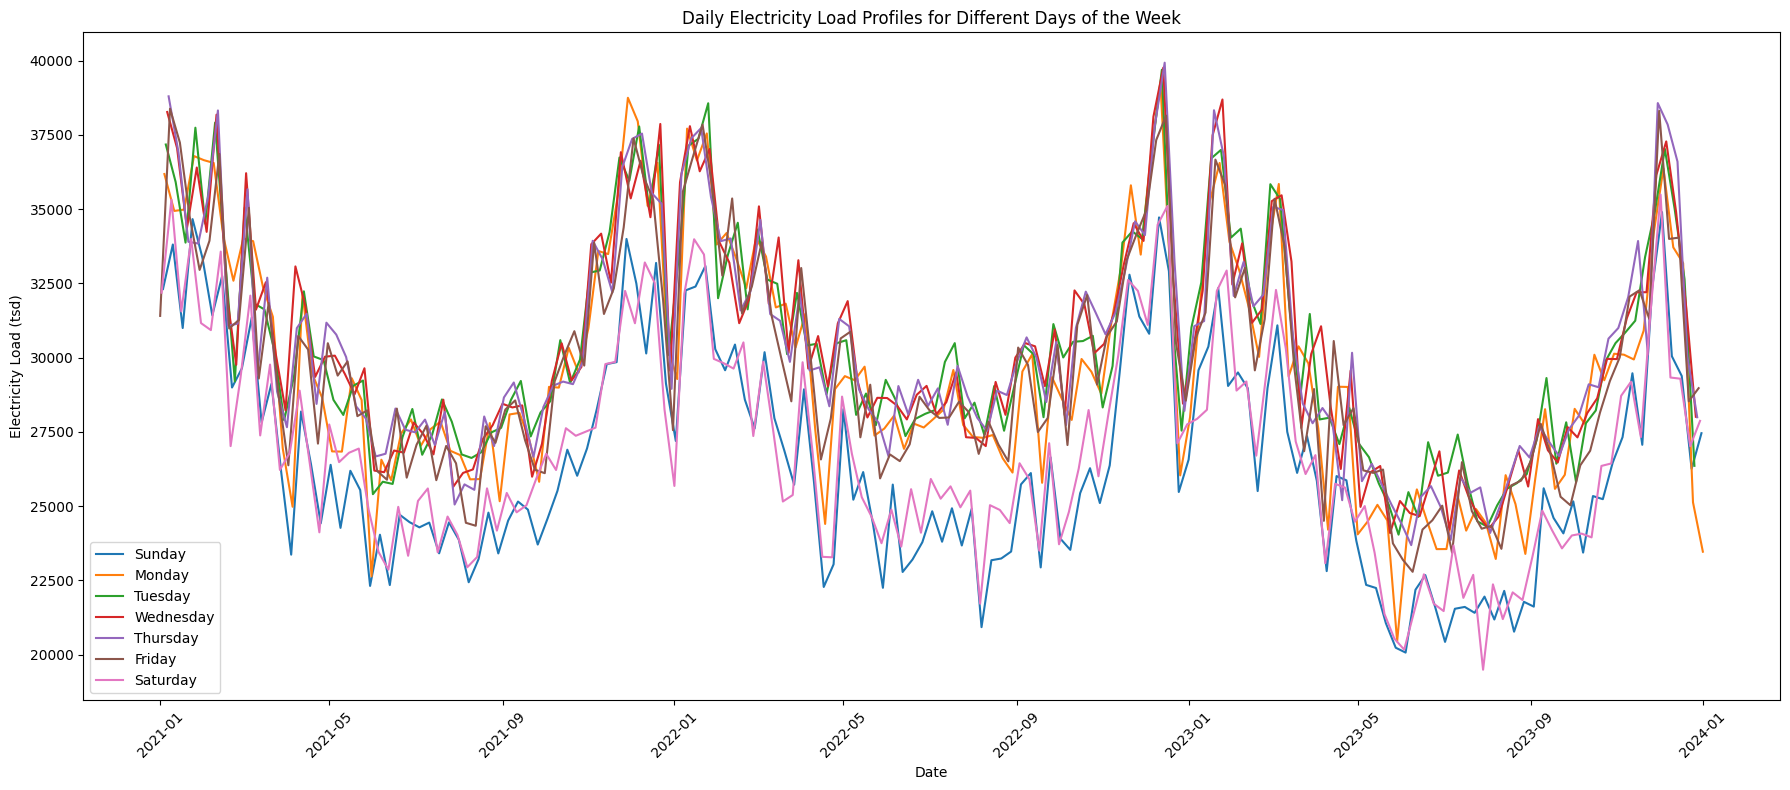

In [ ]:
from datetime import datetime

'''
This code segment analyzes the daily electricity load profiles for different days of the week over a three-year period.

Steps:
1. Filter the DataFrame "df_raw" to include data from 2021 to 2023.
2. Convert the "settlement_date" column to datetime format.
3. Round the "settlement_date" column to the nearest day.
4. Calculate the mean of 'tsd' for each day.
5. Assign day names (Monday to Sunday) and reorder them starting from Monday.
6. Plot the daily electricity load profiles for different days of the week.

The resulting plot illustrates the variation in electricity load patterns across different days of the week.
'''
df3_year = df_raw[(df_raw["settlement_date"] >= "2021-01-01 00:00:00")&(df_raw["settlement_date"] <= "2024-01-01 00:00:00")]
df3_year['settlement_date'] = pd.to_datetime(df3_year['settlement_date'])

# Round 'settlement_date' to the nearest day
df3_year['settlement_date'] = df3_year['settlement_date'].dt.floor('d')

# Calculate mean of 'tsd' for each day
daily_means = df3_year.groupby('settlement_date')['tsd'].mean().reset_index()

# Assign day names (Monday to Sunday)
daily_means['day_of_week'] = daily_means['settlement_date'].dt.dayofweek
daily_means['day_name'] = daily_means['settlement_date'].dt.day_name()

# Reorder days of the week starting from Monday
daily_means['day_of_week'] = (daily_means['day_of_week'] + 1) % 7

# Plot the daily electricity load profiles for different days of the week
fig, ax = plt.subplots(figsize=(18, 8))

# Iterate over each day of the week
for _, data in daily_means.groupby('day_of_week'):
    ax.plot(data['settlement_date'], data['tsd'], label=data['day_name'].iloc[0])

# Customize plot
ax.set_title('Daily Electricity Load Profiles for Different Days of the Week')
ax.set_xlabel('Date')
ax.set_ylabel('Electricity Load (tsd)')
ax.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
'''
This code segment extracts information about holidays and day of the week from the DataFrame "df_raw".
The resulting DataFrame "df_holiday" contains the original columns along with the day of the week information.
'''

df_holiday=df_raw[["settlement_date","tsd","is_holiday"]]
# Convert 'settlement_date' to datetime format
df_holiday['settlement_date'] = pd.to_datetime(df_holiday['settlement_date'])

# Extract day of the week and assign it to a new column
df_holiday['day_of_week'] = df_holiday['settlement_date'].dt.day_name()
df_holiday.reset_index(drop=True)


<ipython-input-11-8f07ddfa9b7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holiday['settlement_date'] = pd.to_datetime(df_holiday['settlement_date'])
<ipython-input-11-8f07ddfa9b7a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holiday['day_of_week'] = df_holiday['settlement_date'].dt.day_name()


,settlement_date,tsd,is_holiday,day_of_week
0,2009-01-01 00:00:00,38704,1,Thursday
1,2009-01-01 00:30:00,38964,1,Thursday
2,2009-01-01 01:00:00,38651,1,Thursday
3,2009-01-01 01:30:00,37775,1,Thursday
4,2009-01-01 02:00:00,37298,1,Thursday
...,...,...,...,...
266747,2024-04-04 21:30:00,29227,0,Thursday
266748,2024-04-04 22:00:00,27561,0,Thursday
266749,2024-04-04 22:30:00,26300,0,Thursday
266750,2024-04-04 23:00:00,24586,0,Thursday


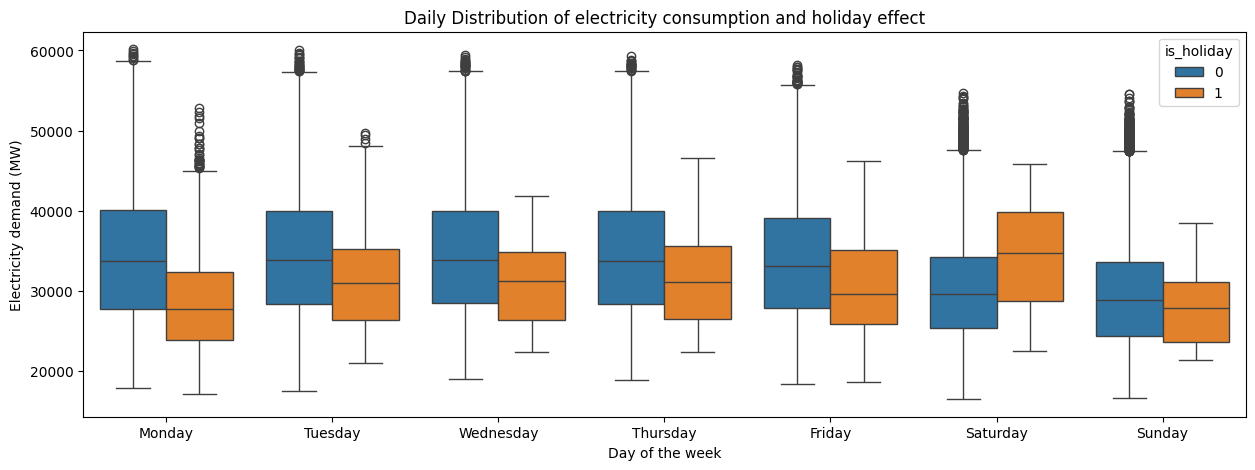

In [ ]:
import seaborn as sns
'''
This code segment creates a boxplot to visualize the daily distribution of electricity consumption and its relationship with holidays.
The resulting plot shows the distribution of electricity consumption for each day of the week, with the effect of holidays highlighted.
'''
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="day_of_week", y="tsd", data=df_holiday, hue="is_holiday", ax=ax, order=day_order)


ax.set_xlabel("Day of the week")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Daily Distribution of electricity consumption and holiday effect")
plt.show()


In [ ]:
'''
This code segment prepares holiday-related data for the years 2020, 2021, and 2022.
The resulting DataFrames (df2020_hol, df2021_hol, df2022_hol) contain the average electricity demand ('tsd') and holiday information ('is_holiday') for the specified holiday periods in the respective years.
'''

df2020_hol = df_raw[["settlement_date","tsd","is_holiday"]]
df2020_hol = df2020_hol[(df2020_hol["settlement_date"] >= "2019-12-20")&(df2020_hol["settlement_date"] <= "2020-01-03")]
df2020_hol['settlement_date'] = pd.to_datetime(df2020_hol['settlement_date'])
df2020_hol['settlement_date'] = df2020_hol['settlement_date'].dt.floor('D')
df2020_hol = df2020_hol.groupby('settlement_date').agg({"tsd":"mean",'is_holiday': 'mean'}).reset_index()

df2021_hol = df_raw[["settlement_date","tsd","is_holiday"]]
df2021_hol = df2021_hol[(df2021_hol["settlement_date"] >= "2020-12-20")&(df2021_hol["settlement_date"] <= "2021-01-03")]
df2021_hol['settlement_date'] = pd.to_datetime(df2021_hol['settlement_date'])
df2021_hol['settlement_date'] = df2021_hol['settlement_date'].dt.floor('D')
df2021_hol = df2021_hol.groupby('settlement_date').agg({"tsd":"mean",'is_holiday': 'mean'}).reset_index()

df2022_hol = df_raw[["settlement_date","tsd","is_holiday"]]
df2022_hol = df2022_hol[(df2022_hol["settlement_date"] >= "2021-12-20")&(df2022_hol["settlement_date"] <= "2022-01-03")]
df2022_hol['settlement_date'] = pd.to_datetime(df2022_hol['settlement_date'])
df2022_hol['settlement_date'] = df2022_hol['settlement_date'].dt.floor('D')
df2022_hol = df2022_hol.groupby('settlement_date').agg({"tsd":"mean",'is_holiday': 'mean'}).reset_index()


<ipython-input-13-37915cf6a220>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022_hol['settlement_date'] = pd.to_datetime(df2022_hol['settlement_date'])
<ipython-input-13-37915cf6a220>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022_hol['settlement_date'] = df2022_hol['settlement_date'].dt.floor('D')


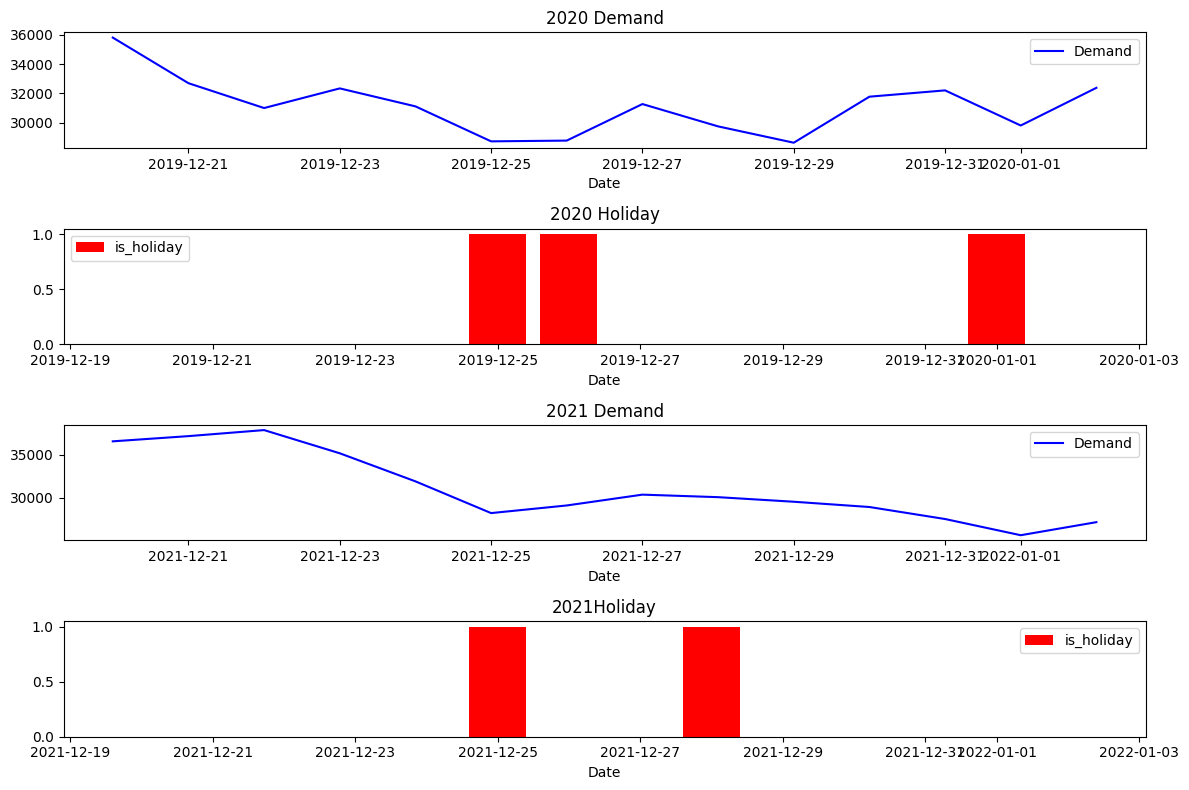

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(12, 8))

'''
This code segment creates subplots to visualize the electricity demand and holiday information for the years 2020 and 2021.
The resulting subplots provide insights into the electricity demand and holiday patterns for the specified years.
'''

axs[0].plot(df2020_hol['settlement_date'], df2020_hol['tsd'], label='Demand',color="blue")
axs[0].set_title('2020 Demand')
axs[0].set_xlabel('Date')
axs[0].legend()

axs[1].bar(df2020_hol['settlement_date'], df2020_hol['is_holiday'], label='is_holiday', color="red")
axs[1].set_title('2020 Holiday')
axs[1].set_xlabel('Date')
axs[1].legend()

axs[2].plot(df2022_hol['settlement_date'], df2022_hol['tsd'], label='Demand',color="blue")
axs[2].set_title('2021 Demand')
axs[2].set_xlabel('Date')
axs[2].legend()

axs[3].bar(df2022_hol['settlement_date'], df2022_hol['is_holiday'], label='is_holiday', color="red")
axs[3].set_title('2021Holiday')
axs[3].set_xlabel('Date')
axs[3].legend()

plt.tight_layout()
plt.show()

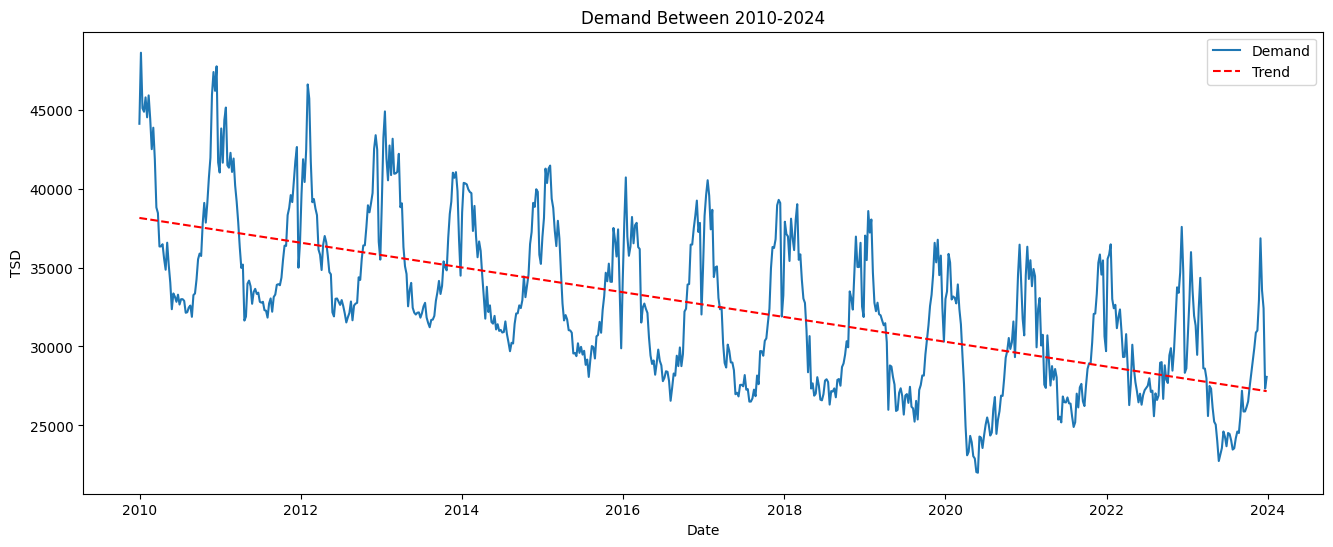

In [ ]:
from sklearn.linear_model import LinearRegression

'''
This code segment visualizes the trend in electricity demand between 2010 and 2024, along with a linear trend line.
The resulting plot provides insights into the overall trend in electricity demand over the specified period.
'''

df_week_all = df_raw[["settlement_date","tsd","is_holiday"]]
df_week_all = df_week_all[(df_week_all["settlement_date"] >= "2010-01-01")&(df_week_all["settlement_date"] <= "2024-01-01")]
df_week_all['settlement_date'] = pd.to_datetime(df_week_all['settlement_date'])
df_week_all['settlement_date'] = df_week_all['settlement_date'].dt.floor('7D')
df_week_all = df_week_all.groupby('settlement_date').agg({"tsd":"mean",'is_holiday': 'mean'}).reset_index()


plt.subplots(figsize=(16, 6))
plt.plot(df_week_all['settlement_date'], df_week_all['tsd'], label='Demand')

# Adding trend line
X = np.array(range(len(df_week_all))).reshape(-1,1)
y = df_week_all['tsd']
model = LinearRegression().fit(X, y)
trend_line = model.predict(X)
plt.plot(df_week_all['settlement_date'], trend_line, color='red', linestyle='--', label='Trend')

plt.legend()
plt.title('Demand Between 2010-2024')
plt.xlabel('Date')
plt.ylabel('TSD')

plt.show()

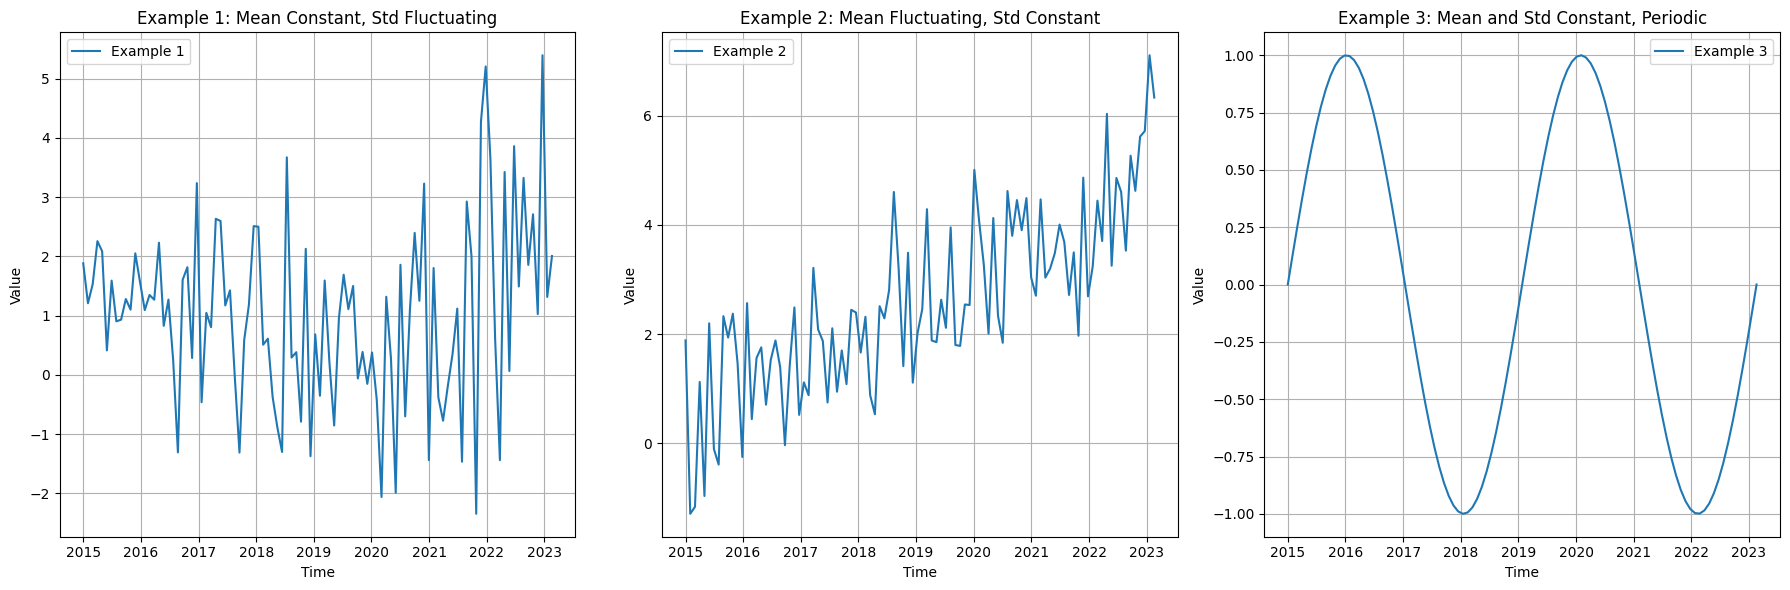

In [ ]:
'''
This code segment generates and plots three example datasets side by side to illustrate different time series patterns.

Generate three example datasets:
    a. Example 1: Constant mean with fluctuating standard deviation.
    b. Example 2: Fluctuating mean with constant standard deviation.
    c. Example 3: Constant mean and standard deviation with a periodic pattern.
The resulting plots showcase different time series patterns, including fluctuations in mean and standard deviation, as well as periodic behavior.
'''

# Set random seed for reproducibility
np.random.seed(0)

# Generate time index
n_points = 100
time_index = pd.date_range(start="2015-01-01", periods=n_points, freq="30D")

# Dataset 1: Constant mean, fluctuating standard deviation
mean_1 = 1  # Constant mean
std_values_1 = np.linspace(0.5, 2.5, num=n_points)  # Fluctuating standard deviation
values_1 = np.random.normal(loc=mean_1, scale=std_values_1, size=n_points)

# Dataset 2: Fluctuating mean, constant standard deviation
trend_values_2 = np.linspace(0, 5, num=n_points)  # Rising trend
std_2 = 1  # Constant standard deviation
values_2 = np.random.normal(loc=trend_values_2, scale=std_2, size=n_points)

# Dataset 3: Constant mean and standard deviation, periodic
mean_3 = 0
std_3 = 1
values_3 = np.sin(np.linspace(0, 4 * np.pi, num=n_points))  # Periodic values

# Create DataFrames
df_1 = pd.DataFrame({"Time": time_index, "Value": values_1})
df_2 = pd.DataFrame({"Time": time_index, "Value": values_2})
df_3 = pd.DataFrame({"Time": time_index, "Value": values_3})

# Plot all three datasets side by side
plt.figure(figsize=(18, 6))

# Dataset 1
plt.subplot(1, 3, 1)
plt.plot(df_1["Time"], df_1["Value"], label="Example 1")
plt.title("Example 1: Mean Constant, Std Fluctuating")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# Dataset 2
plt.subplot(1, 3, 2)
plt.plot(df_2["Time"], df_2["Value"], label="Example 2")
plt.title("Example 2: Mean Fluctuating, Std Constant")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# Dataset 3
plt.subplot(1, 3, 3)
plt.plot(df_3["Time"], df_3["Value"], label="Example 3")
plt.title("Example 3: Mean and Std Constant, Periodic")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


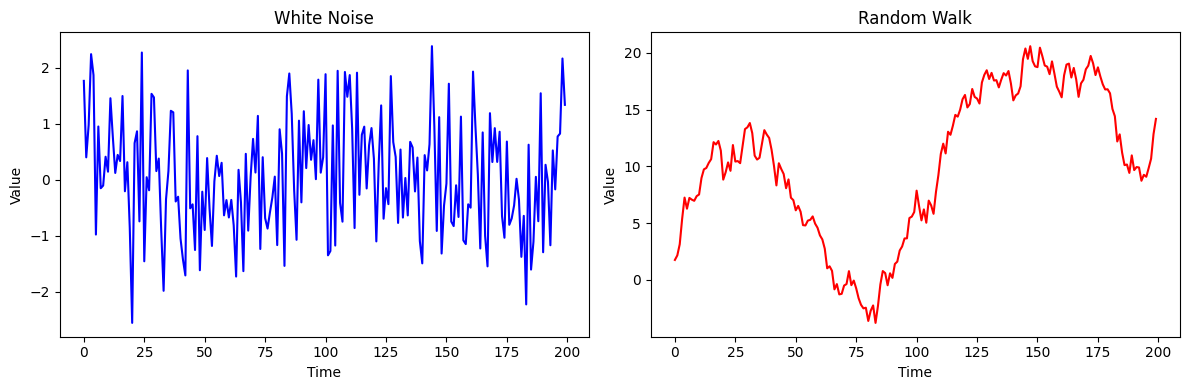

In [ ]:
'''
This code segment generates and plots two types of time series data side by side: white noise and a random walk.
The resulting plots illustrate the characteristics of white noise and random walk time series data.
'''
# Set random seed for reproducibility
np.random.seed(0)

# Number of time points
n_points = 200

# Generate white noise
white_noise = np.random.normal(loc=0, scale=1, size=n_points)

# Generate random walk
random_walk = np.cumsum(white_noise)

# Create time index
time_index = np.arange(n_points)

# Plot side by side
plt.figure(figsize=(12, 4))

# White noise plot
plt.subplot(1, 2, 1)
plt.plot(time_index, white_noise, color='blue')
plt.title('White Noise')
plt.xlabel('Time')
plt.ylabel('Value')

# Random walk plot
plt.subplot(1, 2, 2)
plt.plot(time_index, random_walk, color='red')
plt.title('Random Walk')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


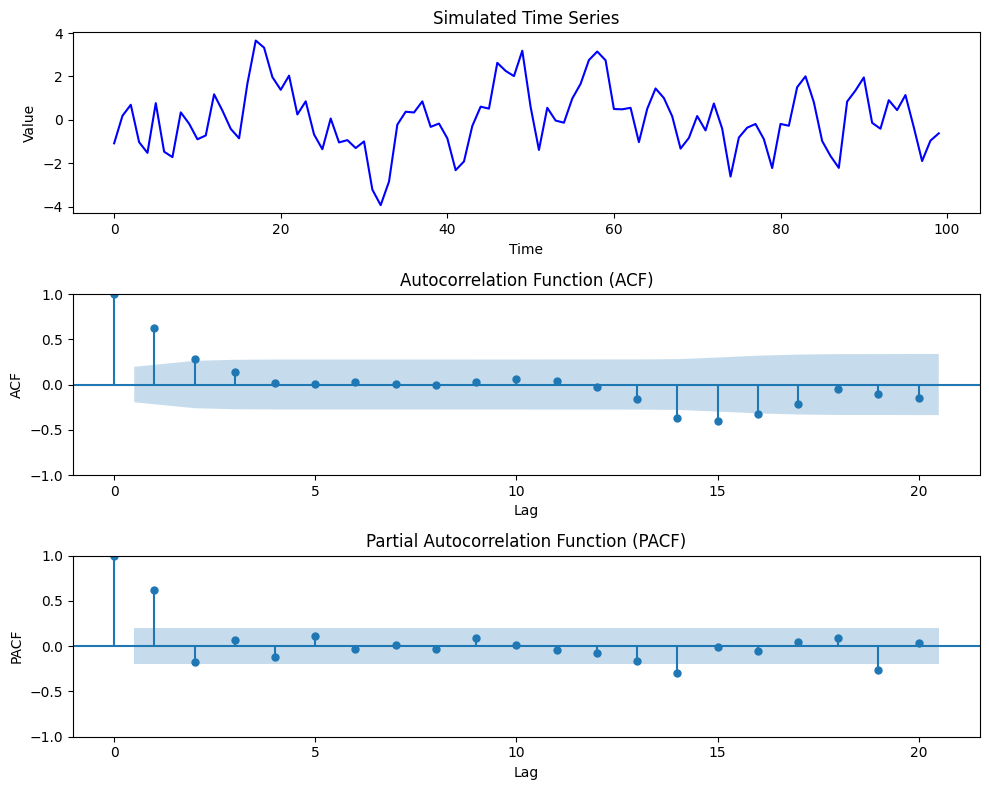

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

'''
This code segment generates simulated time series data using an ARMA(2,0) process with specific AR coefficients and visualizes the time series along with its autocorrelation function (ACF) and partial autocorrelation function (PACF).
The resulting plots provide insights into the autocorrelation structure of the simulated time series data and aid in determining appropriate parameters for time series modeling.
'''
# Define ARIMA(2,0,0) parameters
ar_coefs = np.array([1, -0.75, 0.25])  # AR coefficients

# Create ARMA process
arma_process = ArmaProcess(ar_coefs)

# Generate simulated data
np.random.seed(123)
simulated_data = arma_process.generate_sample(nsample=100)

# Plot time series, ACF, and PACF
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Plot time series
axes[0].plot(simulated_data, color='blue')
axes[0].set_title('Simulated Time Series')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')

# Plot ACF
plot_acf(simulated_data, lags=20, ax=axes[1])
axes[1].set_title('Autocorrelation Function (ACF)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('ACF')

# Plot PACF
plot_pacf(simulated_data, lags=20, ax=axes[2])
axes[2].set_title('Partial Autocorrelation Function (PACF)')
axes[2].set_xlabel('Lag')
axes[2].set_ylabel('PACF')

plt.tight_layout()
plt.show()


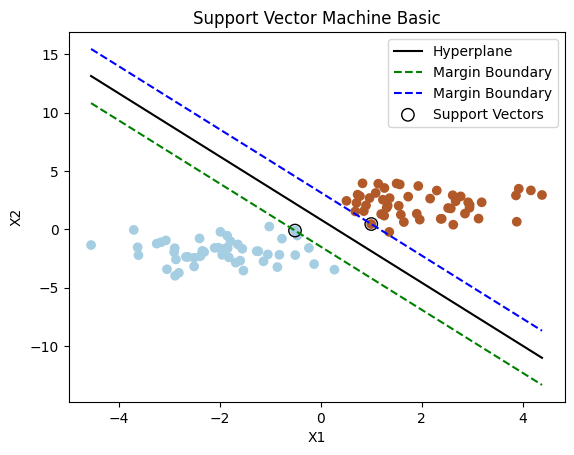

In [ ]:
from sklearn import svm
'''
This code segment demonstrates how to train a Support Vector Machine (SVM) classifier with a linear kernel using scikit-learn (sklearn).
It generates random data for two classes, fits the SVM classifier to the data, and visualizes the decision boundary, margins, and support vectors.
The resulting plot visualizes the decision boundary, margins, and support vectors of the trained SVM classifier.
'''


# Generate random data for two classes
np.random.seed(0)
X1 = np.random.randn(50, 2) - 2  # Class 1 centered at (-2, -2)
X2 = np.random.randn(50, 2) + 2  # Class 2 centered at (2, 2)
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(50), np.ones(50)))  # Labels: 0 for Class 1, 1 for Class 2

# Create a Support Vector Classifier
clf = svm.SVC(kernel='linear', C=1.0)

# Fit the classifier to the data
clf.fit(X, y)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy, 'k-', label='Hyperplane')

# Plot the decision boundaries and margins
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

plt.plot(xx, yy_down, 'g--', label='Margin Boundary')
plt.plot(xx, yy_up, 'b--', label='Margin Boundary')

# Plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('Support Vector Machine Basic')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


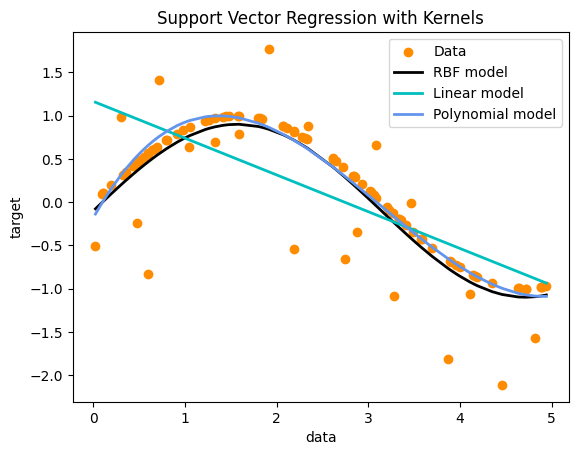

In [ ]:
from sklearn.svm import SVR

'''
This code segment demonstrates how to perform Support Vector Regression (SVR) with different kernel functions (RBF, linear, polynomial) using scikit-learn (sklearn).
It generates random data, adds noise to the targets, and fits SVR models with different kernels to the data.
The resulting plot visualizes the SVR models with different kernel functions fitted to the random data, showing the regression curves for each model.
'''


# Generate random data
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(20))

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, epsilon=.1)
svr_poly = SVR(kernel='poly', C=100, degree=3, epsilon=.1, coef0=1)

y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# Plot results
lw = 2
plt.scatter(X, y, color='darkorange', label='Data')
plt.plot(X, y_rbf, color='black', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression with Kernels')
plt.legend()
plt.show()


In [ ]:
import holidays

'''
This code segment demonstrates how to use the `holidays` library in Python to fetch holiday dates for a specific country and year, and then convert the fetched data into a pandas DataFrame.
The resulting DataFrame (`holiday_df`) contains the holiday dates and names for the specified country and year, sorted by date.
'''


# Choose the country and year for which you want to get holidays
country_code = 'GB'  # Country code for the United Kingdom
year = 2021,2022,2023

# Get the list of holidays for the specified country and year
holiday_list = holidays.CountryHoliday(country_code, years=year)

# Convert the holiday list to a DataFrame
holiday_df = pd.DataFrame(list(holiday_list.items()), columns=['ds', 'holiday'])

# Sort DataFrame by date
holiday_df = holiday_df.sort_values(by='ds').reset_index(drop=True)

holiday_df.reset_index(drop=True)


,ds,holiday
0,2021-01-01,New Year's Day
1,2021-04-02,Good Friday
2,2021-05-03,May Day
3,2021-05-31,Spring Bank Holiday
4,2021-12-25,Christmas Day
5,2021-12-26,Boxing Day
6,2021-12-27,Christmas Day (observed)
7,2021-12-28,Boxing Day (observed)
8,2022-01-01,New Year's Day
9,2022-01-03,New Year's Day (observed)


<ipython-input-42-8dfa83e32ae7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="settlement_period", y="tsd", data=df3_year_energy, palette="rainbow")


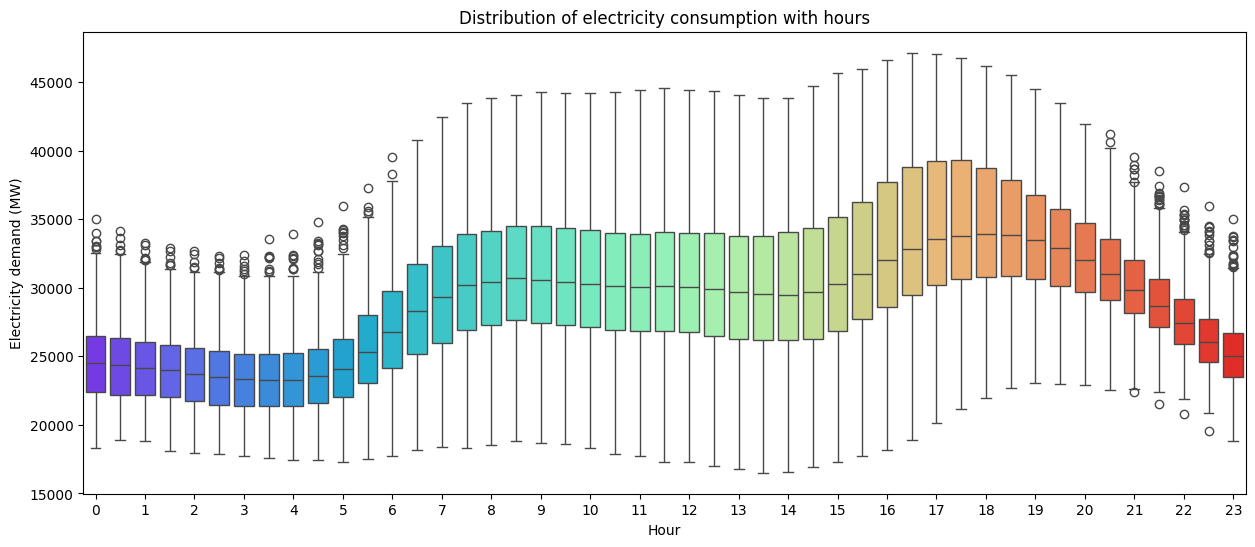

In [ ]:
'''
This code segment preprocesses and visualizes electricity demand data for a specific period (2021-2024), focusing on settlement periods.
The resulting box plot visualizes the distribution of electricity consumption across different settlement periods (half-hour intervals) throughout the day.
'''
df3_year_energy = df_raw[["settlement_date","tsd","is_holiday"]]
df3_year_energy = df3_year_energy[(df3_year_energy["settlement_date"] >= "2021-01-01 00:00:00")&(df3_year_energy["settlement_date"] <= "2024-01-01 00:00:00")]
df3_year_energy.reset_index(inplace=True)

df3_year_energy['settlement_date'] = pd.to_datetime(df3_year_energy['settlement_date'])

# Create a new column for settlement periods
df3_year_energy['settlement_period'] = (df3_year_energy['settlement_date'].dt.hour * 2) + (df3_year_energy['settlement_date'].dt.minute // 30) + 1

# Create the box plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="settlement_period", y="tsd", data=df3_year_energy, palette="rainbow")

# Set the x-axis ticks and labels
ax.set_xticks(range(1, 49, 2))
ax.set_xticklabels(range(0, 24))

# Set the x-axis limit to ensure the lowest thick plot is at zero and the highest at 23
ax.set_xlim(0.5, 47.5)

# Set labels and title
ax.set_xlabel("Hour")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption with hours")

plt.show()



In [ ]:
df_weather = pd.read_csv("weather 2021-01-01 to 2024-01-01.csv")
df_weather['datetime'] = df_weather['datetime'].str.replace('T', ' ')
weather3_year = df_weather[["datetime","temp"]]
weather3_year = weather3_year[(weather3_year["datetime"] >= "2021-01-01 00:00:00")&(weather3_year["datetime"] <= "2024-01-01 00:00:001")]
weather3_year["datetime"] = pd.to_datetime(weather3_year["datetime"])
weather3_year

,datetime,temp
0,2021-01-01 00:00:00,1.6
1,2021-01-01 01:00:00,1.5
2,2021-01-01 02:00:00,1.6
3,2021-01-01 03:00:00,1.6
4,2021-01-01 04:00:00,1.0
...,...,...
26276,2023-12-31 20:00:00,8.3
26277,2023-12-31 21:00:00,8.6
26278,2023-12-31 22:00:00,8.1
26279,2023-12-31 23:00:00,8.6


<ipython-input-48-401ca900886d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="temp", data=weather3_year, palette="rainbow")


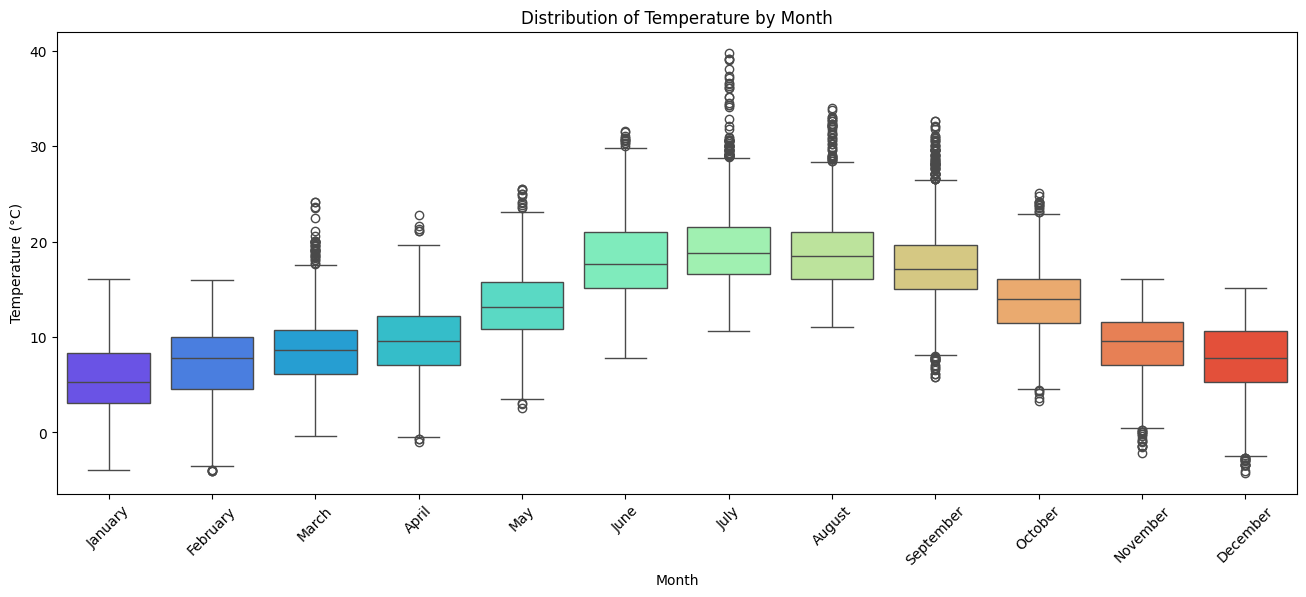

In [ ]:
import calendar

'''
This code segment preprocesses and visualizes weather data for a specific period (2021-2024), focusing on temperature distribution by month.
The resulting box plot visualizes the distribution of temperature across different months, providing insights into seasonal temperature variations.
'''

weather3_year['month'] = weather3_year['datetime'].dt.month

# Create a mapping of month numbers to month names
month_names = {i: calendar.month_name[i] for i in range(1, 13)}

# Replace month numbers with month names
weather3_year['month'] = weather3_year['month'].map(month_names)

# Create the box plot
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x="month", y="temp", data=weather3_year, palette="rainbow")

# Set labels and title
ax.set_xlabel("Month")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Distribution of Temperature by Month")

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()